# Ingeniería de Características

En esta parte vamos a trabajar con los diferentes procesos de los que se encarga la ingeniería de características.

Para abordar las tareas relativas a la ingeniería de características con Python vamos a utilizar e introducir la  **librería sklearn** (https://scikit-learn.org/stable/index.html), ampliamente utilizada en procesos de aprendizaje automático e ingeniería de características. Utilizaremos diferentes módulos dependiendo cuál sea nuestro objetivo:



*   sklearn.preprocessing (https://scikit-learn.org/stable/modules/preprocessing.html).
*   sklearn.feature_selection (https://scikit-learn.org/stable/modules/feature_selection.html).
* sklearn.decomposition (https://scikit-learn.org/stable/api/sklearn.decomposition.html).
*   Entre otras.



Además, en esta librería podemos encontrar el módulo sklearn.datasets (https://scikit-learn.org/stable/api/sklearn.datasets.html) que incluye conjuntos de datos que nos posibilitan experimentar y realizar pequeños análisis con una finálidad didáctica.

Cabe mencionar que, además de esta librería, continuaremos utilizando las librerías utilizadas anteriores: pandas, numpy, scipy y matplotlib para las visualizaciones.


**La parte práctica de esta PEC consta de un ejercicio único o proyecto que girará entorno un dataset escogido por el estudiante entre las 5 opciones de datasets que se plantean:**

-Income Data Set:	https://archive.ics.uci.edu/dataset/2/adult

-Dermatology Data Set:	https://archive.ics.uci.edu/dataset/33/dermatology

-Stroke Prediction Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

-Ames Housing Dataset: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset

-Hepatitis C Prediction Dataset: https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset


**Como en las prácticas anteriores, se realiza una breve introducción de las funciones e implementaciones relevantes que os puedan orientar en la realización del ejercicio práctico planteado.**

# Proceso de ingeniería de características

En esta parte, se plantea la realización de todo el proceso de ingeniería de características con un dataset que hemos escogido y se llevara a cabo todos los pasos.

-Stroke Prediction Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



### Cargamos los datos

In [ ]:
import pandas as pd
import os

In [ ]:
# Cargar/leer el archivo
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))


Path to dataset files: /kaggle/input/stroke-prediction-dataset
['healthcare-dataset-stroke-data.csv']


### 1. Basándose en el dataset escogido, ¿cuál es el objetivo de este análisis o micro-proyecto?

1.1. Cargamos los datos y guardarlos como un dataframe de pandas, asignando un nombre pertinente a las columnas.

1.2. Describimos brevemente el dataset elegido

1.3. Determinamos qué tipo de problema se puede abordar con él (problema de clasificación o de regresión).

1.4. Determinamos de qué tipo es cada una de las variables del dataset. ¿A qué hace referencia cada una de ellas? ¿Cuáles son las características? ¿Cuál (o cuáles) es la clase o variable de respuesta?


####**1.1 Cargamos los datos**

In [ ]:
#1.1 Guardamos los datos como un df
file_path = os.path.join(path, "healthcare-dataset-stroke-data.csv")

# Cargar el archivo en un DataFrame
df_stroke_data = pd.read_csv(file_path)

# Mostrar las primeras filas
print(df_stroke_data.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
# cambiamos el nombre de las columnas

# Diccionario con los nuevos nombres en español
columnas_espanol = {
    "gender": "sexo",
    "age": "edad",
    "hypertension": "hipertension",
    "heart_disease": "enfermedad_cardiaca",
    "avg_glucose_level": "nivel_promedio_glucosa",
    "bmi": "indice_masa_corporal",
    "work_type": "tipo_trabajo",
    "ever_married": "alguna_vez_casado",
    "Residence_type": "tipo_residencia",
    "smoking_status": "estado_fumador",
    "stroke": "accidente_cerebrovascular"
}

# Aplicar los nuevos nombres al DataFrame
df_stroke_data.rename(columns=columnas_espanol, inplace=True)

# Mostrar las primeras filas con los nombres actualizados
print(df_stroke_data.head())


      id    sexo  edad  hipertension  enfermedad_cardiaca alguna_vez_casado  \
0   9046    Male  67.0             0                    1               Yes   
1  51676  Female  61.0             0                    0               Yes   
2  31112    Male  80.0             0                    1               Yes   
3  60182  Female  49.0             0                    0               Yes   
4   1665  Female  79.0             1                    0               Yes   

    tipo_trabajo tipo_residencia  nivel_promedio_glucosa  \
0        Private           Urban                  228.69   
1  Self-employed           Rural                  202.21   
2        Private           Rural                  105.92   
3        Private           Urban                  171.23   
4  Self-employed           Rural                  174.12   

   indice_masa_corporal   estado_fumador  accidente_cerebrovascular  
0                  36.6  formerly smoked                          1  
1                   NaN 

####**1.2 Descripción del conjunto de datos**

El conjunto de datos seleccionado se utiliza para predecir la probabilidad de que un paciente sufra un ictus según parámetros como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

Número de atributos: 11 características relevantes para la predicción y la variable objetivo.

**Variables principales:**
- id (identificador unico)
- Genero (categórica: masculino/femenino).
- Edad (numérica continua).
- Hipertensión (binaria: 0 = No, 1 = Sí).
- Enfermedad cardíaca (binaria: 0 = No, 1 = Sí).
- Nivel promedio de glucosa en sangre (numérica continua).
- Índice de masa corporal (BMI) (numérica continua).
- Estado de fumador (categórica: nunca, anteriormente, actualmente).
- Estado civil (binaria: No o Yes)
- Tipo de trabajo (categórica: privado, autónomo, etc.).
- Residencia urbana o rural (categórica).
- Variable objetivo: "stroke" (binaria: 1 = tuvo un accidente cerebrovascular, 0 = no tuvo).**bold text**

####**1.3 Tipo de problema que se puede abordar**

Este conjunto de datos pertenece a un problema de clasificación. La variable objetivo (stroke) representa si un paciente tuvo un accidente derebrovascular o no.

####**1.4 Tipos de variables en el dataset Stroke Predictio**
El dataset contiene 11 variables, de las cuales 10 son predictoras y 1 es la variable objetivo (stroke). Vamos a clasificarlas según su tipo y propósito.

**Variables de entrada (features)**
Las características usadas para predecir el riesgo de accidente cerebrovascular:
- Demográficas:
  - gender (Categórica) → Sexo del paciente (Male, Female, Other).
  - age (Numérica continua) → Edad del paciente.
- Factores de riesgo:
  - hypertension (Binaria) → Si el paciente tiene hipertensión (0 = No, 1 = Sí).
  - heart_disease (Binaria) → Si tiene antecedentes de enfermedad cardíaca (0 = No, 1 = Sí).
  - avg_glucose_level (Numérica continua) → Nivel medio de glucosa en sangre.
  - bmi (Numérica continua) → Índice de masa corporal (IMC).
- Factores sociales y estilo de vida:
  - work_type (Categórica) → Tipo de trabajo (Private, Self-employed, Govt_job, Children, Never_worked).
  - residence_type (Categórica) → Tipo de residencia (Urban o Rural).
  - smoking_status (Categórica) → Estado de fumador (Unknown, Never smoked, Formerly smoked, Smokes).

**Variable de respuesta (target)**
La variable objetivo (stroke) es binaria, indicando si el paciente ha sufrido un accidente cerebrovascular:
- stroke (Binaria) → 1 = Sí, 0 = No.


In [ ]:
# obtenemos el detalle de nuestras variables
print(df_stroke_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5110 non-null   int64  
 1   sexo                       5110 non-null   object 
 2   edad                       5110 non-null   float64
 3   hipertension               5110 non-null   int64  
 4   enfermedad_cardiaca        5110 non-null   int64  
 5   alguna_vez_casado          5110 non-null   object 
 6   tipo_trabajo               5110 non-null   object 
 7   tipo_residencia            5110 non-null   object 
 8   nivel_promedio_glucosa     5110 non-null   float64
 9   indice_masa_corporal       4909 non-null   float64
 10  estado_fumador             5110 non-null   object 
 11  accidente_cerebrovascular  5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


### 2. Análisis descriptivo de las variables.

In [ ]:
# 2.1 obtenemos las metricas estadisticas
summary = df_stroke_data.describe()
print(summary)

                 id         edad  hipertension  enfermedad_cardiaca  \
count   5110.000000  5110.000000   5110.000000          5110.000000   
mean   36517.829354    43.226614      0.097456             0.054012   
std    21161.721625    22.612647      0.296607             0.226063   
min       67.000000     0.080000      0.000000             0.000000   
25%    17741.250000    25.000000      0.000000             0.000000   
50%    36932.000000    45.000000      0.000000             0.000000   
75%    54682.000000    61.000000      0.000000             0.000000   
max    72940.000000    82.000000      1.000000             1.000000   

       nivel_promedio_glucosa  indice_masa_corporal  accidente_cerebrovascular  
count             5110.000000           4909.000000                5110.000000  
mean               106.147677             28.893237                   0.048728  
std                 45.283560              7.854067                   0.215320  
min                 55.120000       

In [ ]:
# Calculamos el porcentaje de pacientes que han sufrido un accidente cerebrovascular
porcentaje_stroke = (df_stroke_data["accidente_cerebrovascular"].sum() / len(df_stroke_data)) * 100

print(f"Porcentaje de accidentes cerebrovasculares: {porcentaje_stroke:.2f}%")

Porcentaje de accidentes cerebrovasculares: 4.87%


Con el resumen estadístico de las variables cuantitativas, podemos hacer las siguientes observaciones:
- Edad:
  - Rango amplio (0.08 años a 82 años).
  - Media de 43.22 años, lo que sugiere una población relativamente adulta.
  - Desviación estándar de 22.61, indicando una gran variabilidad en edades.
- Hipertensión y enfermedad cardíaca:
  - La mayoría de los pacientes no tienen hipertensión ni enfermedad cardíaca, ya que la mediana y el percentil 75% son 0.
  - Solo el 9.74% tiene hipertensión y el 5.4% enfermedad cardíaca.
- Nivel promedio de glucosa:
  - Media de 106.14, pero con una desviación estándar alta (45.28), lo que indica una gran variabilidad en los niveles de azúcar en sangre.
  - El percentil 75% está en 114.09, lo que sugiere que algunos pacientes tienen niveles altos de glucosa.
- Índice de masa corporal (IMC):
  - Media de 28.89, lo que sugiere que la mayoría de los pacientes están en el rango de sobrepeso.
  - Hay casos extremos con un IMC de hasta 97.6, lo cual es significativamente alto.
  - Algunas personas tienen valores faltantes en esta variable (número de registros es 4909 en lugar de 5110).
- Accidente cerebrovascular:
  - Solo 4.87% de los pacientes han tenido un accidente cerebrovascular, lo que indica un desbalance en las clases (muchos casos negativos).


In [ ]:
# 2.2 obtenemos las tablas de frecuencia de las variables categóricas.
# Filtramos las columnas categóricas (tipo 'object' o 'category')
variables_categoricas = df_stroke_data.select_dtypes(include=["object", "category"]).columns

print("Variables categóricas:", variables_categoricas)

# Mostramos tablas de frecuencia de cada variable categórica
for columna in variables_categoricas:
    print(f"\nFrecuencia de {columna}:")
    print(df_stroke_data[columna].value_counts())

Variables categóricas: Index(['sexo', 'alguna_vez_casado', 'tipo_trabajo', 'tipo_residencia',
       'estado_fumador'],
      dtype='object')

Frecuencia de sexo:
sexo
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Frecuencia de alguna_vez_casado:
alguna_vez_casado
Yes    3353
No     1757
Name: count, dtype: int64

Frecuencia de tipo_trabajo:
tipo_trabajo
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Frecuencia de tipo_residencia:
tipo_residencia
Urban    2596
Rural    2514
Name: count, dtype: int64

Frecuencia de estado_fumador:
estado_fumador
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


A continuación vamos a mostrar los graficos para tener una visión más clara de la distribución de nuestras variables:

Variables numéricas: Index(['id', 'edad', 'hipertension', 'enfermedad_cardiaca',
       'nivel_promedio_glucosa', 'indice_masa_corporal',
       'accidente_cerebrovascular'],
      dtype='object')


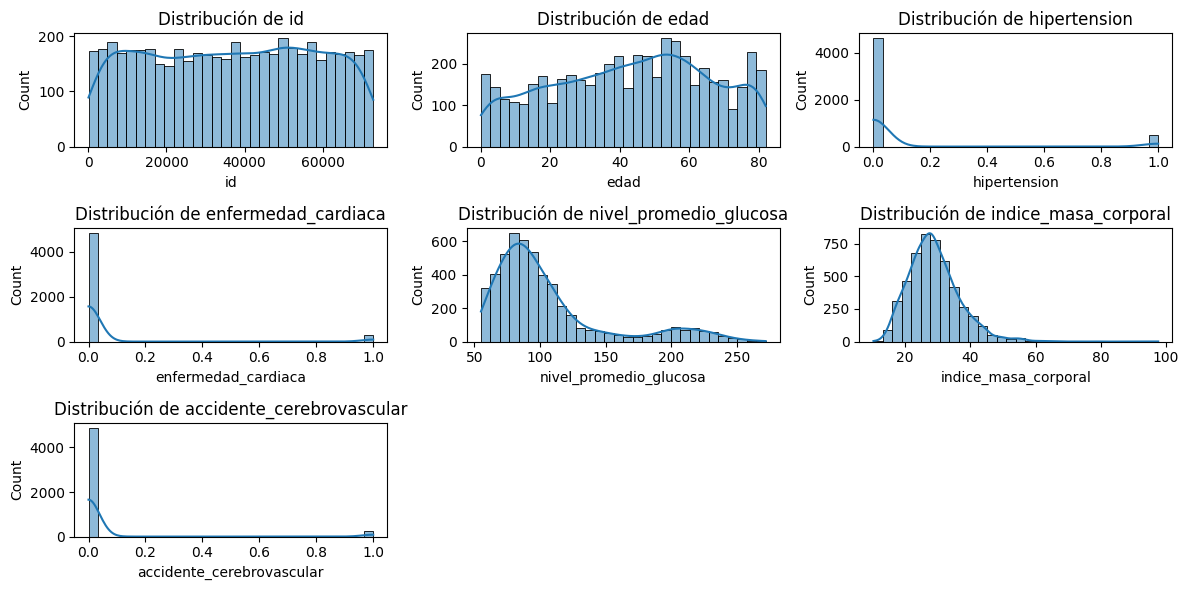

In [ ]:
#2.3  Obtenemo los histogramas para los datos numéricos y diagramas de frecuencia para los datos categóricos.
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenemos las variables numéricas
variables_numericas = df_stroke_data.select_dtypes(include=["int64", "float64"]).columns
print("Variables numéricas:", variables_numericas)


# Creamo los histogramas para las variables númericas
plt.figure(figsize=(12, 6))
for i, columna in enumerate(variables_numericas, 1):
    plt.subplot(3, 3, i)  # Ajustamos para mostrar 3 filas y 3 columnas
    sns.histplot(df_stroke_data[columna], bins=30, kde=True)
    plt.title(f"Distribución de {columna}")
plt.tight_layout()
plt.show()


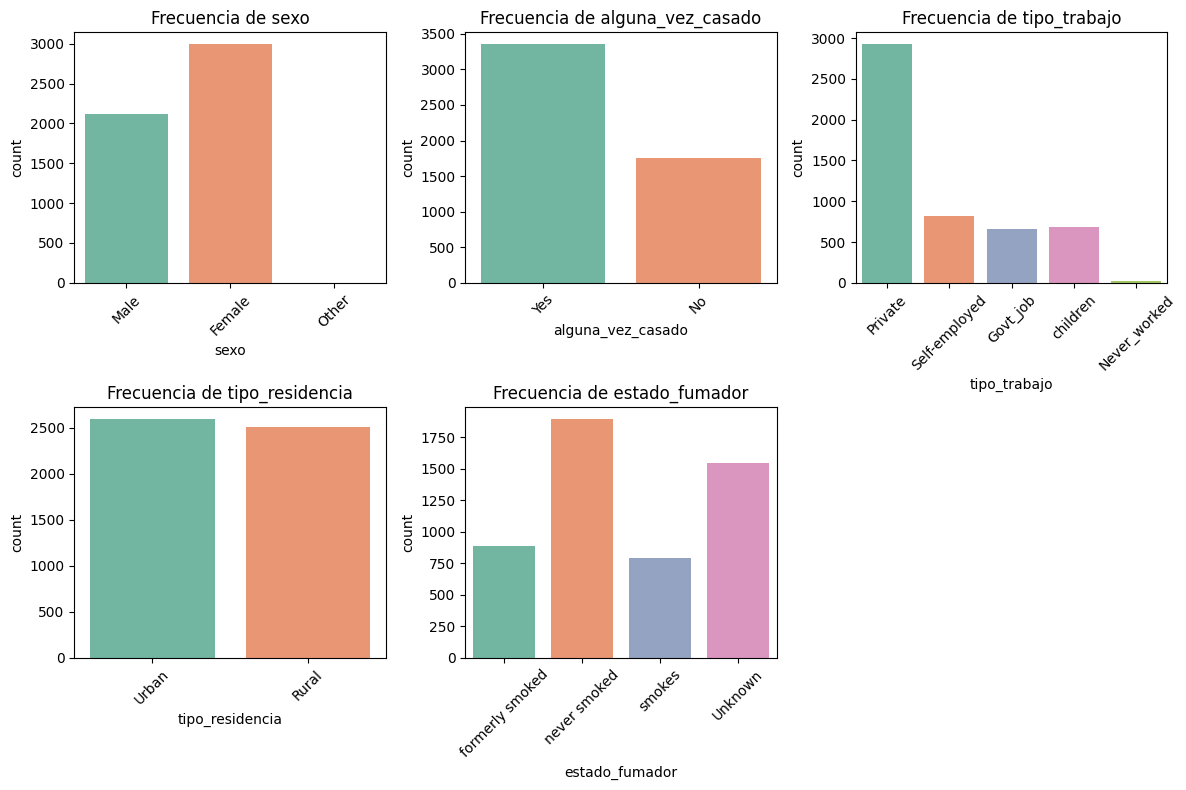

In [ ]:
# Creamos los gráficos de barras para las variables categoricas
plt.figure(figsize=(12, 8))
for i, columna in enumerate(variables_categoricas, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df_stroke_data, x=columna, hue=columna, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Frecuencia de {columna}")
plt.tight_layout()
plt.show()

Con los graficos obtenidos podemos hacer las siguientes observaciones:

**Análisis de la distribución de las variables**

**Variables numericas:**
  
  - Edad: Distribución bimodal, con mayor concentración entre los 30 y 60 años, lo que podría indicar la presencia de diferentes grupos etarios afectados por condiciones médicas relevantes.

  - Hipertensión, enfermedad cardíaca y accidente cerebrovascular: En los gráficos de distribución se observa una alta concentración de valores en 0, lo cual indica que la mayoría de los pacientes no presentan estas afecciones. Este desbalance debe considerarse especialmente en modelos de clasificación, ya que puede afectar el desempeño del modelo al favorecer la clase mayoritaria.

  - Nivel promedio de glucosa: Asimétrica positiva (sesgo a la derecha), con una mayoría de valores en rangos normales y algunos valores extremos que podrían representar pacientes diabéticos o con hiperglucemia.

  - Índice de masa corporal (IMC): Tiene una distribución aproximadamente normal con ligero sesgo a la derecha, centrada en torno a valores típicos de sobrepeso leve, lo cual puede ser clínicamente relevante.

Con base en la distribución de frecuencias de las **variables categóricas**, se observan las siguientes tendencias relevantes:

- Sexo: Predominio de pacientes femeninos.

- Estado civil: Cerca de dos tercios de los individuos han estado casados alguna vez, lo que refuerza la presencia mayoritaria de adultos.

- Tipo de trabajo: El sector privado es el más representado, seguido de trabajo autónomo, gobierno, y un grupo considerable de niños (sin empleo). La categoría "never_worked" tiene una frecuencia muy baja.

- Tipo de residencia: Distribución bastante equilibrada entre áreas urbanas y rurales.

- Estado de fumador: La categoría más común es "nunca fumó", seguida de "se desconoce" (Unknown), lo cual puede indicar valores faltantes implícitos o ambigüedad en los datos. Esta particularidad sugiere que puede ser necesario tratar o reinterpretar esta variable antes de su análisis.



**Particuliaridades detacadas:**

- Desbalance de clases en variables binarias como hipertensión, enfermedad cardíaca y accidentes cerebrovasculares, lo que puede afectar el rendimiento de modelos de clasificación.

- Alta proporción de datos desconocidos en estado_fumador, lo cual puede afectar la calidad del modelo si no se gestiona adecuadamente (imputación o creación de categoría especial).

- Presencia de niños como categoría en tipo de trabajo, lo que puede cruzarse con edad para entender mejor los segmentos poblacionales.

- Valores extremos en glucosa e IMC que podrían ser outliers clínicamente válidos y no errores, pero deben analizarse más a fondo.

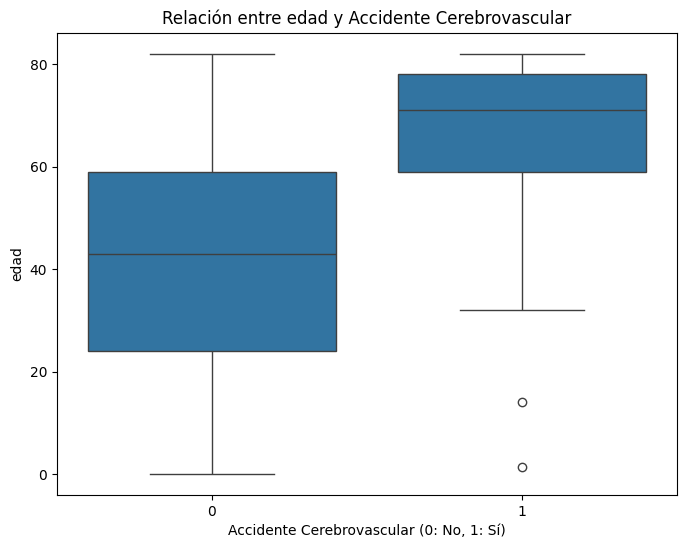

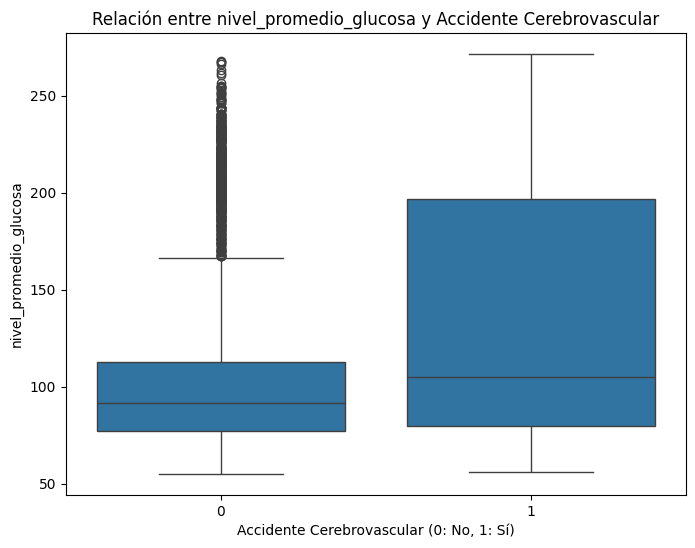

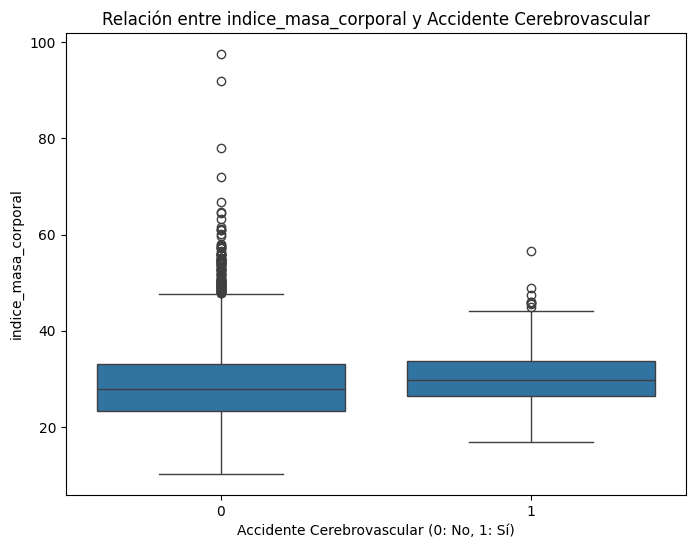

In [ ]:

# Gráficos de caja para variables numéricas vs. accidente cerebrovascular
numerical_cols = ['edad', 'nivel_promedio_glucosa', 'indice_masa_corporal']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='accidente_cerebrovascular', y=col, data=df_stroke_data)
    plt.title(f'Relación entre {col} y Accidente Cerebrovascular')
    plt.xlabel('Accidente Cerebrovascular (0: No, 1: Sí)')
    plt.ylabel(col)
    plt.show()

Al analizar la relación entre las variables numericas y la variable objetivo, se puede apreciar como los pacientes de más de 60 años tiene más disposición a sufir accidente cerbrovascular y podría ser un factor de riesgo, también los pacientes con glucosa alta, por otro lado, en cuanto al Indice de masa corporal, tambien observamos como a cuento mayor IMC, mayor predisposicion a sufrir accidente cerebrovascular.

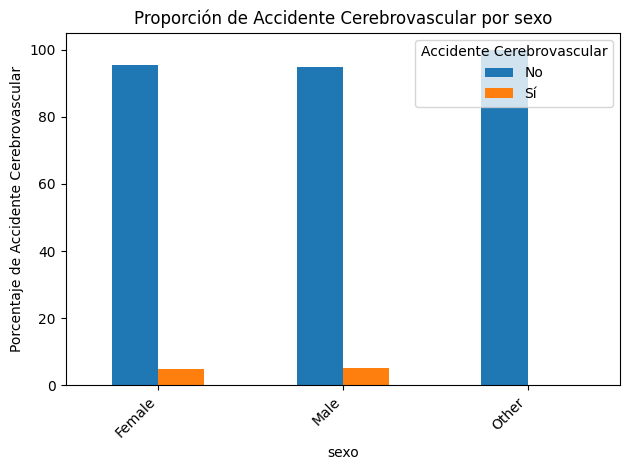

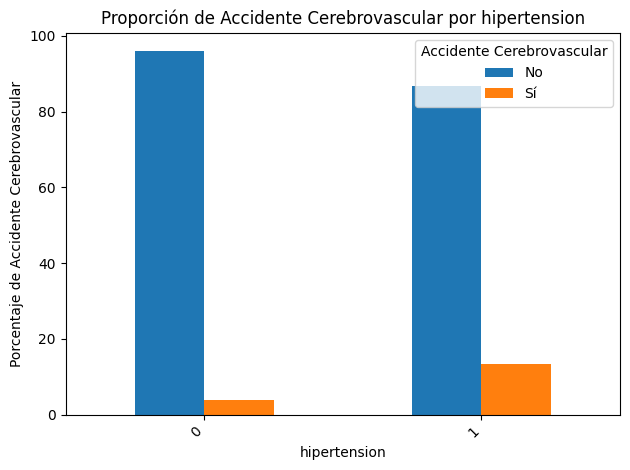

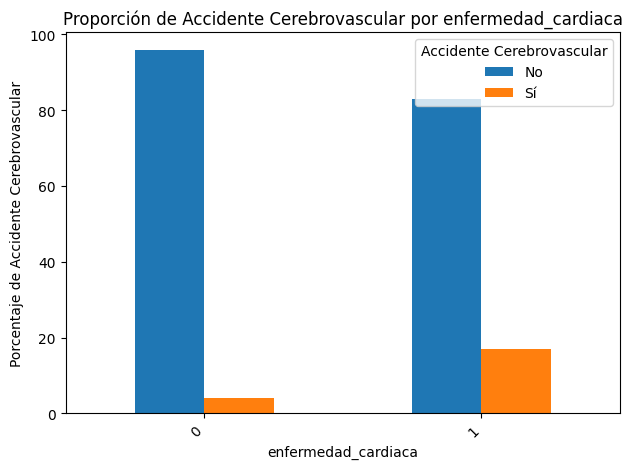

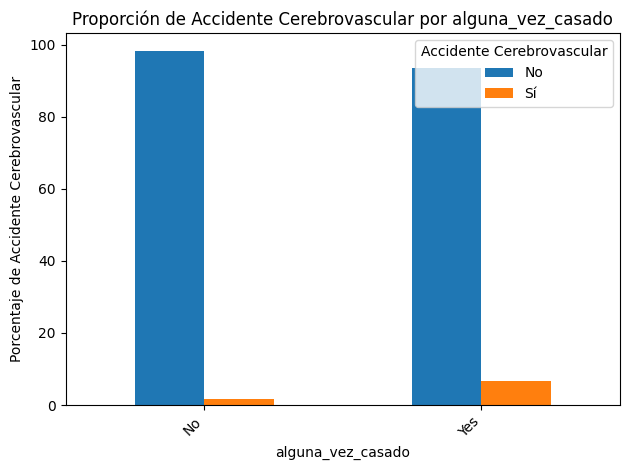

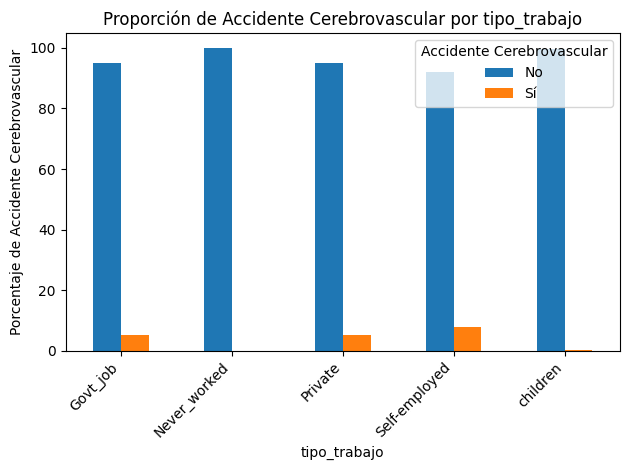

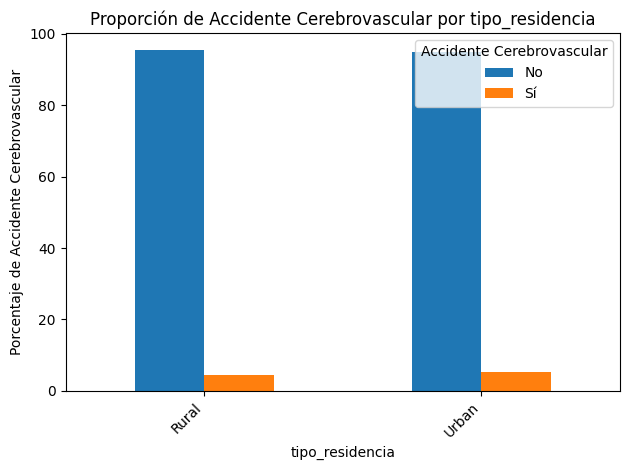

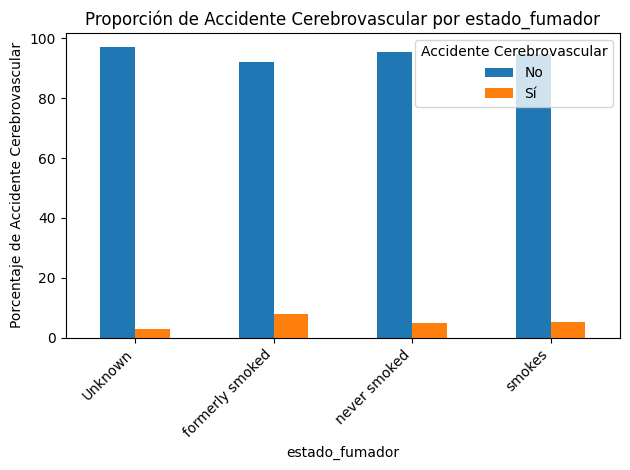

In [ ]:
# Gráficos de barras para variables categóricas vs. accidente cerebrovascular
categorical_cols = ['sexo', 'hipertension', 'enfermedad_cardiaca', 'alguna_vez_casado', 'tipo_trabajo', 'tipo_residencia', 'estado_fumador']

for col in categorical_cols:
    contingency_table = pd.crosstab(df_stroke_data[col], df_stroke_data['accidente_cerebrovascular'], normalize='index') * 100
    contingency_table.plot(kind='bar', stacked=False)
    plt.title(f'Proporción de Accidente Cerebrovascular por {col}')
    plt.xlabel(col)
    plt.ylabel('Porcentaje de Accidente Cerebrovascular')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Accidente Cerebrovascular', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()

Al analizar la relación entre las variables categóricas y la variable objetivo ('accidente_cerebrovascular'), se observa un desequilibrio significativo, con una mayoría sustancial de pacientes que no sufrieron un accidente cerebrovascular en comparación con aquellos que sí lo experimentaron.

En cuanto a la variable sexo, el análisis visual y las proporciones sugieren que no existe una diferencia marcada en la incidencia de accidentes cerebrovasculares entre pacientes femeninos y masculinos. Por lo tanto, basándonos en esta exploración inicial, el sexo no parece ser un factor determinante directo para el riesgo de ictus en este conjunto de datos. Sin embargo, podría haber interacciones con otras variables que influyan en el riesgo de manera diferente para cada sexo, lo cual requeriría un análisis más profundo.

Por otro lado, se identifica una tendencia clara que sugiere una mayor proporción de accidentes cerebrovasculares en pacientes con antecedentes de enfermedad cardíaca. Esto indica que la enfermedad cardíaca podría ser un factor de riesgo importante en esta población. De manera similar, los pacientes que alguna vez han estado casados muestran una mayor predisposición a sufrir un accidente cerebrovascular. Esta observación podría estar correlacionada con la edad, ya que una mayor proporción de individuos casados tienden a ser mayores, y la edad es un conocido factor de riesgo.

Además, se aprecia una mayor proporción de accidentes cerebrovasculares entre los pacientes que fuman o que han fumado anteriormente, lo que sugiere que el hábito de fumar está asociado con un mayor riesgo de ictus.

Respecto al resto de las variables categóricas analizadas (tipo de trabajo y tipo de residencia), la inspección visual de las proporciones de accidentes cerebrovasculares entre sus diferentes categorías no revela diferencias notables que sugieran una fuerte asociación directa con el riesgo de ictus. Si bien podría haber sutilezas o interacciones con otras variables, en este análisis preliminar, no se identifican como factores de riesgo primarios.

### 3. Análisis de datos faltantes y detección de outliers.

Para determinar si tenemos datos faltantes en las variables del dataset, podemos utilizar isnull().sum(), esto mostrará cuantos valores faltantes existe en cada columna.

Con el análisis previo, hemos podido observar que la variable índice de masa corporal (IMC) tiene algunos valores faltantes, las otras variables parecen estar completas, lo que puede facilitar el análisis.

El metodo que vamos a utlizar para procesar los datos faltantes será la **imputación con la mediana** ya que es más resistente a valores extremos y evitará distorsionar la distribución de los datos. La mediana es robusta frente a valores atípicos, a diferencia de la media.

El histograma de IMC presenta una distribución aproximadamente normal, pero con asimetría positiva (cola a la derecha); en este contexto, la mediana preserva mejor la forma original de la distribución y evita sesgos introducidos por los valores extremos de la cola.

In [ ]:
# 3.2 Calcular el porcentaje de valores faltantes en cada columna
porcentaje_nulos = (df_stroke_data.isnull().sum() / len(df_stroke_data)) * 100

# Mostrar los resultados
print(porcentaje_nulos)

id                           0.000000
sexo                         0.000000
edad                         0.000000
hipertension                 0.000000
enfermedad_cardiaca          0.000000
alguna_vez_casado            0.000000
tipo_trabajo                 0.000000
tipo_residencia              0.000000
nivel_promedio_glucosa       0.000000
indice_masa_corporal         3.933464
estado_fumador               0.000000
accidente_cerebrovascular    0.000000
dtype: float64


In [ ]:
# 3.2 Porcesar los datos faltantes con la metodología escogida.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_stroke_data['indice_masa_corporal'] = imputer.fit_transform(df_stroke_data[['indice_masa_corporal']])

# Verificar si aún quedan valores faltantes
print(df_stroke_data.isnull().sum())


id                           0
sexo                         0
edad                         0
hipertension                 0
enfermedad_cardiaca          0
alguna_vez_casado            0
tipo_trabajo                 0
tipo_residencia              0
nivel_promedio_glucosa       0
indice_masa_corporal         0
estado_fumador               0
accidente_cerebrovascular    0
dtype: int64


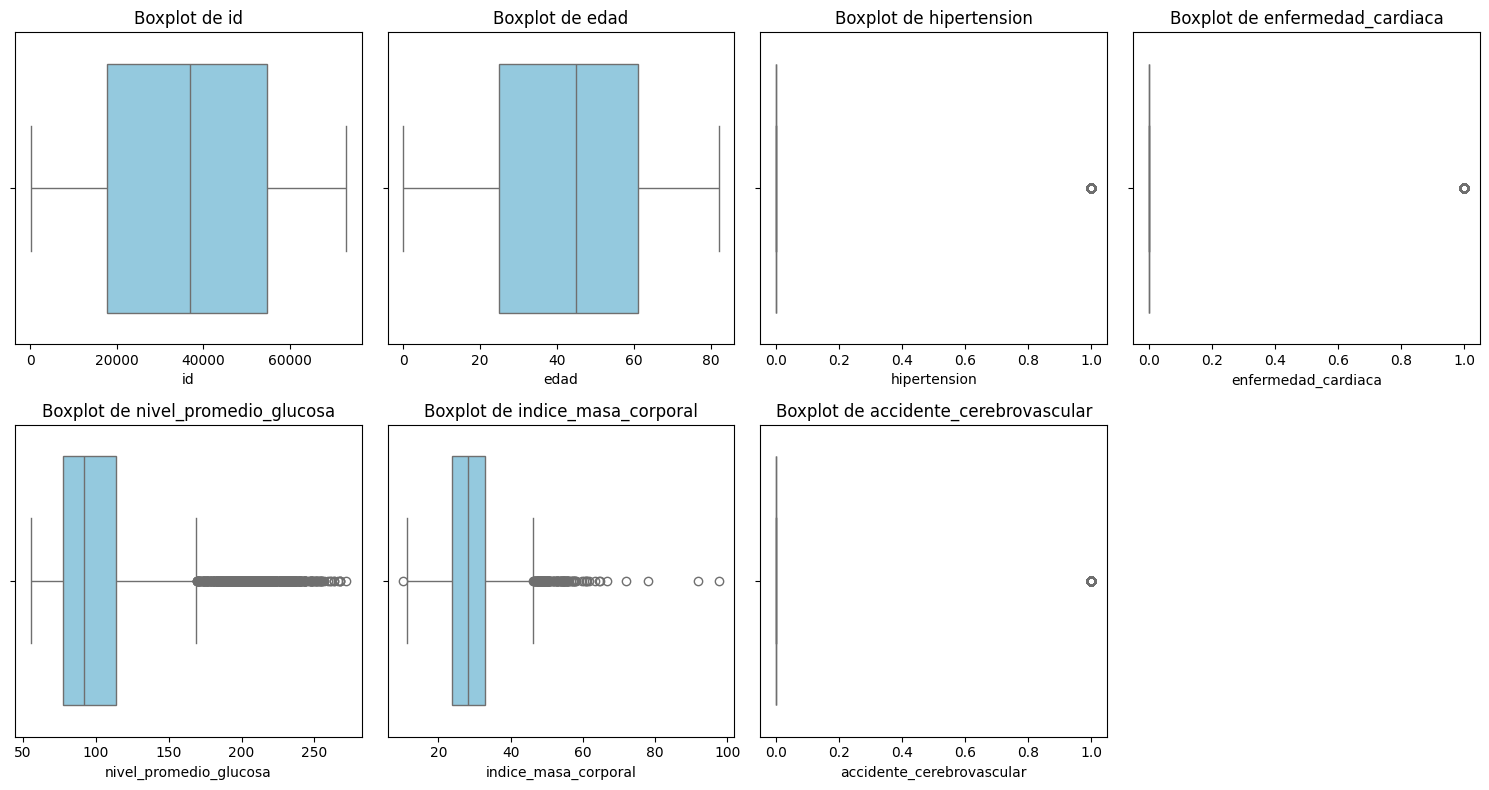

In [ ]:
# 3.3 Detección de outliers

# Representamos un boxplot
# Tamaño general de la figura
plt.figure(figsize=(15, 8))

# Iteramos sobre las variables numéricas y creamos un boxplot para cada una
for i, col in enumerate(variables_numericas):
    plt.subplot(2, int(len(variables_numericas)/2 + 0.5), i+1)  # Ajusta el número de filas/columnas según cantidad
    sns.boxplot(x=df_stroke_data[col], color="skyblue")
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# 3.4.

# Identificamos variables binarias (solo tienen valores 0 y 1)
variables_binarias = [col for col in df_stroke_data.columns if df_stroke_data[col].nunique() == 2]
# Filtramos solo variables numéricas continuas (excluyendo las binarias)
variables_numericas_continuas = df_stroke_data.drop(columns=variables_binarias).select_dtypes(include=["int64", "float64"])

def detectar_outliers_media_desviacion(df, columna, factor=2.5):
    """Detecta outliers utilizando la regla de la media +/- factor * desviación estándar."""
    media = df[columna].mean()
    desviacion = df[columna].std()
    limite_superior = media + factor * desviacion
    limite_inferior = media - factor * desviacion
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

# Aplicamos la detección a cada variable numérica
outliers_media_std = {}
for col in variables_numericas_continuas:
    outliers = detectar_outliers_media_desviacion(df_stroke_data, col)
    outliers_media_std[col] = outliers

# Imprimimos la cantidad de outliers encontrados por este método en cada variable
for col, df_outliers in outliers_media_std.items():
    print(f"Cantidad de outliers en '{col}' (método media +/- 2.5 std): {len(df_outliers)}")

Cantidad de outliers en 'id' (método media +/- 2.5 std): 0
Cantidad de outliers en 'edad' (método media +/- 2.5 std): 0
Cantidad de outliers en 'nivel_promedio_glucosa' (método media +/- 2.5 std): 221
Cantidad de outliers en 'indice_masa_corporal' (método media +/- 2.5 std): 102


Para la detección de outliers en las variables numéricas continuas de este dataset ('edad', 'nivel_promedio_glucosa', 'indice_masa_corporal'), he seleccionado la regla de la media y la desviación estándar. Este método identifica como outliers aquellos valores que se alejan significativamente de la media de la distribución de una variable, específicamente aquellos que caen fuera del rango definido por la media más/menos un cierto número de desviaciones estándar. En este análisis, se ha utilizado un factor de 2.5 desviaciones estándar.


He escogido esta técnica por las siguientes razones:

Simplicidad e Intuitividad: Es un método fácil de entender e implementar. La idea de que los valores que se alejan demasiado del promedio son potencialmente anómalos es intuitiva.

Adecuación para distribuciones aproximadamente normales: Si bien no todas las variables numéricas continuas pueden seguir una distribución perfectamente normal, esta regla funciona razonablemente bien cuando la distribución se acerca a una forma gaussiana. Una inspección visual de los histogramas (realizada en el punto 2.3 del análisis) sugiere que algunas de estas variables tienen una distribución relativamente simétrica.

Identificación de valores extremos significativos: Esta técnica es efectiva para señalar valores que son atípicamente altos o bajos en comparación con la mayoría de los datos. En el contexto de la predicción de ictus, valores extremos en el nivel de glucosa o el índice de masa corporal podrían ser indicadores importantes de un mayor riesgo, y este método ayuda a identificarlos.

### 4. Transformación y escalado de variables

Para transformar las variables categóricas en un formato que los modelos de Machine Learning puedan entender, aplicaremos la tecnica **Dummy coding**, asi eviateremos la redundancia en variables categóricas y la sobrecarga dimensional para nuestro posterior análisis de componentes principales (PCA).


In [ ]:
## 4.1
from sklearn.preprocessing import OneHotEncoder

# Seleccionamos las columnas categóricas
categorical_cols = ['sexo', 'alguna_vez_casado', 'tipo_trabajo', 'tipo_residencia', 'estado_fumador']
df_categorical = df_stroke_data[categorical_cols].copy()

# Inicializamos el OneHotEncoder con drop='first' para evitar multicolinealidad
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
# 'handle_unknown='ignore'' es útil si aparecen nuevas categorías en datos futuros

# Ajustamos el encoder a los datos categóricos y transformamos
encoded_data = encoder.fit_transform(df_categorical)

# Obtenemos los nombres de las nuevas columnas codificadas
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Creamos un nuevo DataFrame con los datos codificados
df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols)

# Concatenamos el DataFrame original (sin las columnas categóricas originales) con el DataFrame codificado
df_processed = pd.concat([df_stroke_data.drop(columns=categorical_cols), df_encoded], axis=1)

# Mostramos las primeras filas del DataFrame procesado
print(df_processed.head())


      id  edad  hipertension  enfermedad_cardiaca  nivel_promedio_glucosa  \
0   9046  67.0             0                    1                  228.69   
1  51676  61.0             0                    0                  202.21   
2  31112  80.0             0                    1                  105.92   
3  60182  49.0             0                    0                  171.23   
4   1665  79.0             1                    0                  174.12   

   indice_masa_corporal  accidente_cerebrovascular  sexo_Male  sexo_Other  \
0                  36.6                          1        1.0         0.0   
1                  28.1                          1        0.0         0.0   
2                  32.5                          1        1.0         0.0   
3                  34.4                          1        0.0         0.0   
4                  24.0                          1        0.0         0.0   

   alguna_vez_casado_Yes  tipo_trabajo_Never_worked  tipo_trabajo_Private 

Para la preparación de los datos, es necesario convertir las variables categóricas a un formato numérico que pueda ser interpretado por los algoritmos de machine learning. En este dataset, las variables categóricas que requieren codificación son: 'sexo', 'alguna_vez_casado', 'tipo_trabajo', 'tipo_residencia' y 'estado_fumador'.

Para estas cinco variables, he escogido la técnica de One-Hot Encoding. La razón principal de esta elección es que ninguna de estas variables posee un orden inherente. Por ejemplo, no hay una jerarquía natural entre los diferentes tipos de trabajo ('Private', 'Self-employed', 'Govt_job', 'Children', 'Never_worked') o entre los estados de fumador ('never smoked', 'Unknown', 'formerly smoked', 'smokes'). Aplicar un codificador ordinal en estos casos podría introducir una relación de orden que no existe en la realidad de los datos, lo que podría confundir al modelo.

One-Hot Encoding crea una nueva columna binaria (0 o 1) para cada categoría única dentro de cada variable categórica. Esto permite que el modelo trate cada categoría como una entidad separada sin asumir ninguna relación de orden entre ellas.

Es importante destacar que las variables 'hipertension' y 'enfermedad_cardiaca' ya se encuentran codificadas en formato numérico binario (0 y 1). Por lo tanto, no requieren la aplicación de ninguna técnica de codificación adicional, ya que ya están en un formato adecuado para ser utilizadas por los modelos.

Analizando las variables numéricas ('edad', 'nivel_promedio_glucosa', 'indice_masa_corporal') y considerando el análisis descriptivo y los gráficos que realizamos anteriormente, podemos reflexionar sobre la necesidad de transformaciones:

'edad': La distribución parecía tener una ligera bimodalidad, pero no presentaba un sesgo extremo. En muchos casos, la edad se utiliza directamente sin transformación.

'nivel_promedio_glucosa': Observamos una asimetría positiva (sesgo a la derecha), con una cola de valores altos. Este tipo de distribución puede ser problemática para algunos modelos, ya que los valores extremos pueden tener una influencia desproporcionada o el modelo podría asumir una distribución más simétrica. Una transformación logarítmica es una técnica común para reducir el sesgo positivo y hacer la distribución más normal. Esto puede ayudar a mejorar el rendimiento de modelos.

'indice_masa_corporal': La distribución era aproximadamente normal con un ligero sesgo a la derecha. Si bien el sesgo no era tan pronunciado como en el nivel de glucosa, una transformación podría ser considerada.

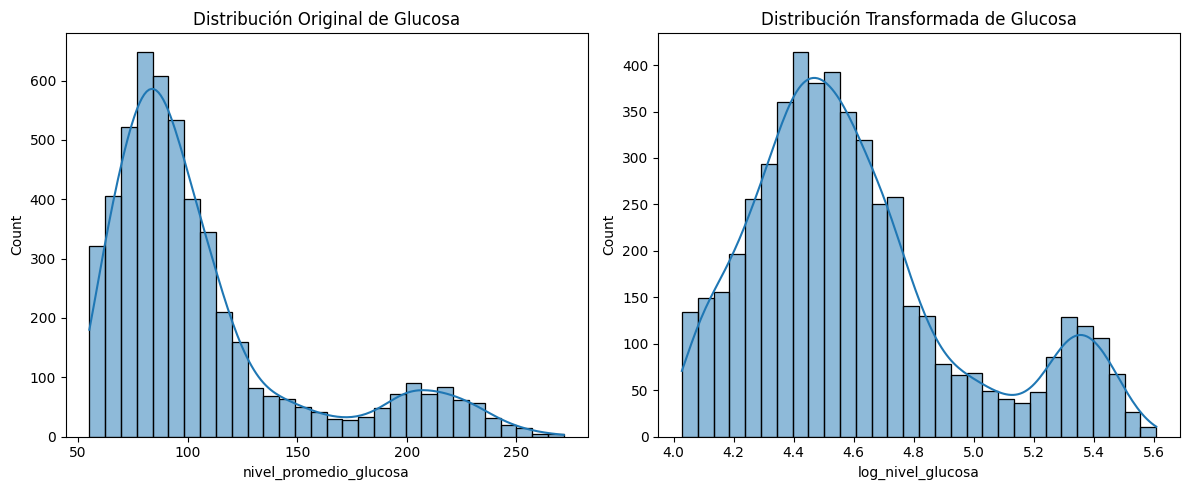

In [ ]:
import numpy as np

# Transformación logarítmica (evitando log(0) con np.log1p)
df_processed["log_nivel_glucosa"] = np.log1p(df_processed["nivel_promedio_glucosa"])

# Ver la comparación antes y después
plt.figure(figsize=(12, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(df_processed["nivel_promedio_glucosa"], bins=30, kde=True)
plt.title("Distribución Original de Glucosa")

# Histograma transformado
plt.subplot(1, 2, 2)
sns.histplot(df_processed["log_nivel_glucosa"], bins=30, kde=True)
plt.title("Distribución Transformada de Glucosa")

plt.tight_layout()
plt.show()

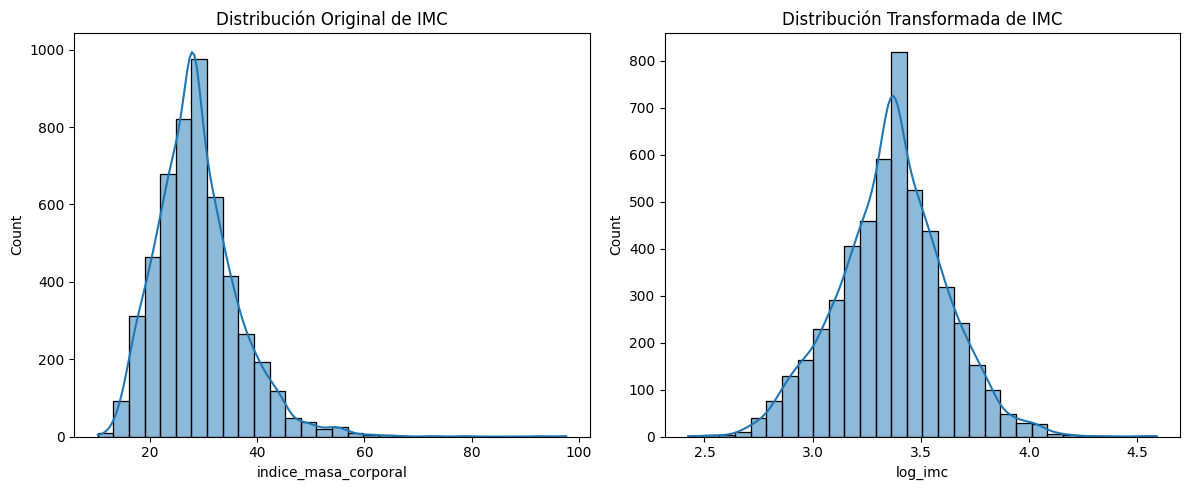

In [ ]:
# Aplicar transformación logarítmica
df_processed["log_imc"] = np.log1p(df_processed["indice_masa_corporal"])

# Comparar antes y después con histogramas
plt.figure(figsize=(12, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(df_processed["indice_masa_corporal"], bins=30, kde=True)
plt.title("Distribución Original de IMC")

# Histograma transformado
plt.subplot(1, 2, 2)
sns.histplot(df_processed["log_imc"], bins=30, kde=True)
plt.title("Distribución Transformada de IMC")

plt.tight_layout()
plt.show()

Al comparar las distribuciones originales y log-transformadas de las variables 'nivel_promedio_glucosa' e 'indice_masa_corporal', se observan los siguientes efectos:

Nivel Promedio de Glucosa: La transformación logarítmica ha logrado reducir significativamente el sesgo positivo presente en la distribución original, haciéndola más simétrica. Además, ha acentuado la presencia de un posible segundo grupo de pacientes con niveles de glucosa muy altos, lo que podría ser relevante para el análisis y el modelado.

Índice de Masa Corporal: La transformación logarítmica ha tenido un efecto menor en la distribución del IMC, aunque se aprecia una ligera reducción del sesgo positivo. La distribución transformada sigue manteniendo una forma aproximadamente normal.

Ahora que el dataset está completamente transformado, aplicaremos la estandarización para las variables numéricas, para asegurarnos que todas tenga una escala adecuada para análisis como PCA o clustering.

In [ ]:
# Seleccionamos todas las columnas numéricas para escalar (incluyendo las codificadas)
numerical_cols_all = df_processed.select_dtypes(include=np.number).columns.tolist()
# Excluimos la variable objetivo 'accidente_cerebrovascular' si está en la lista
if 'accidente_cerebrovascular' in numerical_cols_all:
    numerical_cols_all.remove('accidente_cerebrovascular')
if 'id' in numerical_cols_all:
    numerical_cols_all.remove('id') # También excluimos 'id' que suele ser un identificador

# Creamos una copia del DataFrame para no modificar el original directamente
df_scaled_all = df_processed[numerical_cols_all].copy()

# Inicializamos el StandardScaler
scaler_all = StandardScaler()

# Ajustamos el escalador a todas las variables numéricas y transformamos los datos
df_scaled_all[numerical_cols_all] = scaler_all.fit_transform(df_scaled_all[numerical_cols_all])

df_scaled_all.head()

,edad,hipertension,enfermedad_cardiaca,nivel_promedio_glucosa,indice_masa_corporal,sexo_Male,sexo_Other,alguna_vez_casado_Yes,tipo_trabajo_Never_worked,tipo_trabajo_Private,tipo_trabajo_Self-employed,tipo_trabajo_children,tipo_residencia_Urban,estado_fumador_formerly smoked,estado_fumador_never smoked,estado_fumador_smokes,log_nivel_glucosa,log_imc
0,1.051434,-0.328602,4.185032,2.706375,1.005086,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,2.184951,-0.766774,-0.427313,2.324024,1.045711
1,0.786070,-0.328602,-0.238947,2.121559,-0.098981,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313,1.982522,0.022638
2,1.626390,-0.328602,4.185032,-0.005028,0.472536,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,-1.016178,-0.457676,1.304165,-0.427313,0.192196,0.584773
3,0.255342,-0.328602,-0.238947,1.437358,0.719327,-0.840343,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,-0.457676,-0.766774,2.340204,1.521365,0.805010
4,1.582163,3.043196,-0.238947,1.501184,-0.631531,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313,1.567759,-0.583632


### 5. Extracción de características

Detección de características redundantes

Las características redundantes pueden generar colinealidad, lo que afecta el rendimiento de los modelos y la interpretabilidad de los datos. Para identificarlas, podemos aplicar un analisis de correlacion y visualizar en la matriz las caracterisitcas que estan altamente correlacionadas.

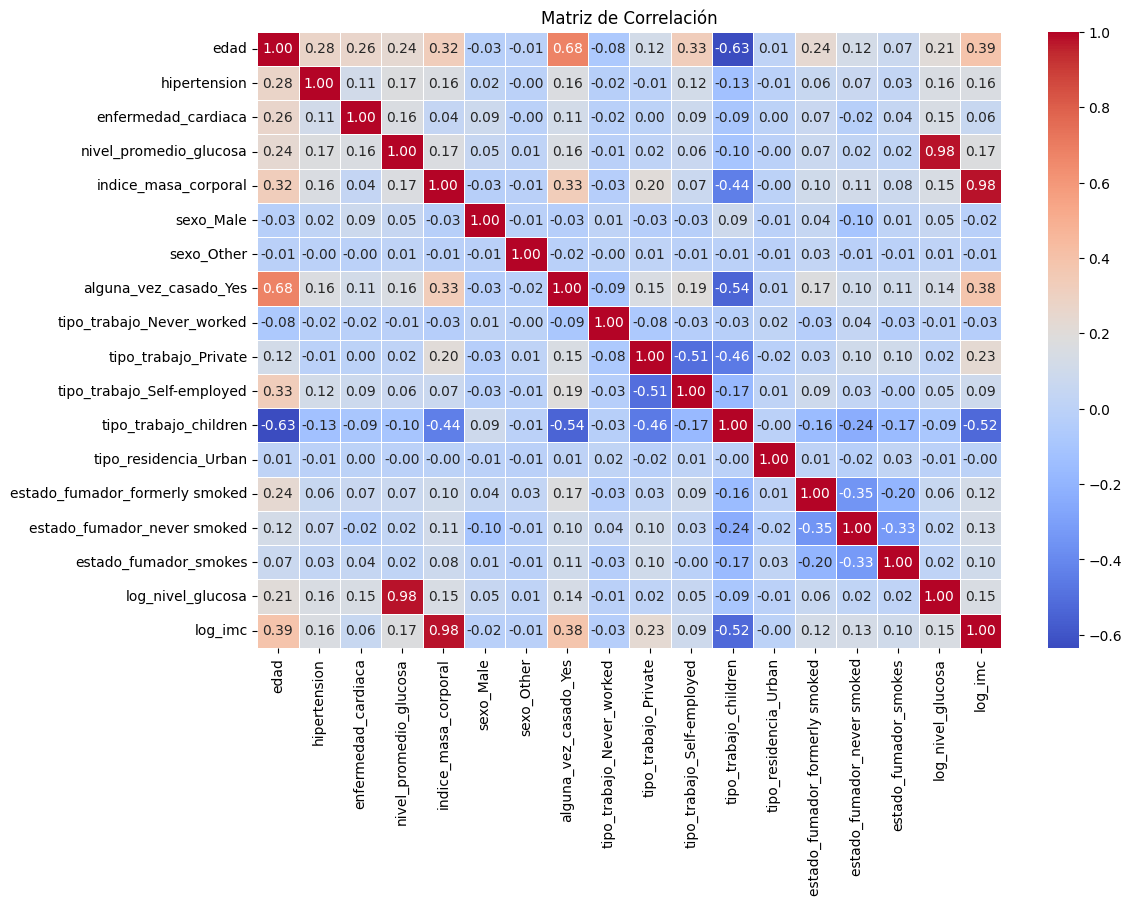

In [ ]:
# Calculamos la matriz de correlación
correlacion = df_scaled_all.corr()

# Visualizamos la correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Dos variables tienen una correlacion alta cuando por ejemplo es mayor a 0.85 la correlacion, porque está más cercano a 1.

En la matriz de correlación vemos que la variable log_nivel_glucosa y nivel_promedio_glucosa sería una caracteristica redundante, la transformación logarítmica convierte una en función de otra. Por lo que vamos a eliminar estar variables y nos quedaremos con las obtenidas en la transformacion logarítmica.

En cuanto al resto de variables, observamos como la edad tiene una relacion con el resto de las variables, tal y como nombramos anteriormente en el analisis.

In [ ]:
# Eliminamos las variables originales después de crear sus versiones log-transformadas
df_processed = df_processed.drop(columns=['nivel_promedio_glucosa', 'indice_masa_corporal'])

Selección de características basada en filtros.

Como estamos ante un problema de clasificiación podemos usar chi-cuadrado o Mutual information (`mutual_info_classif`) para evaluar la importancia de las características.

En nuestro caso, vamos a utilizar Mutual information ya que no asume relaciones lineales entre las variables, lo que lo hace más flexible que metodos como chi2.


In [ ]:
# Primero nos aseguramos de que la varaible objetivo sea una variable categorica binaria
df_processed["accidente_cerebrovascular"] = df_processed["accidente_cerebrovascular"].astype(int)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir X (variables predictoras) y y (variable objetivo)
X = df_processed.drop(columns=["accidente_cerebrovascular"])  # Eliminar la variable objetivo
y = df_processed["accidente_cerebrovascular"]  # Variable objetivo

# Aplicar SelectKBest con Mutual Information
bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all').fit(X, y)

# Obtener scores de importancia
dfscores = pd.DataFrame(bestfeatures.scores_, columns=["IM"])
feature_names = pd.DataFrame(X.columns, columns=["Caracteristica"])
featureScores = pd.concat([feature_names, dfscores], axis=1)

# Ordenar de mayor a menor importancia
featureScores = featureScores.nlargest(len(featureScores), 'IM')

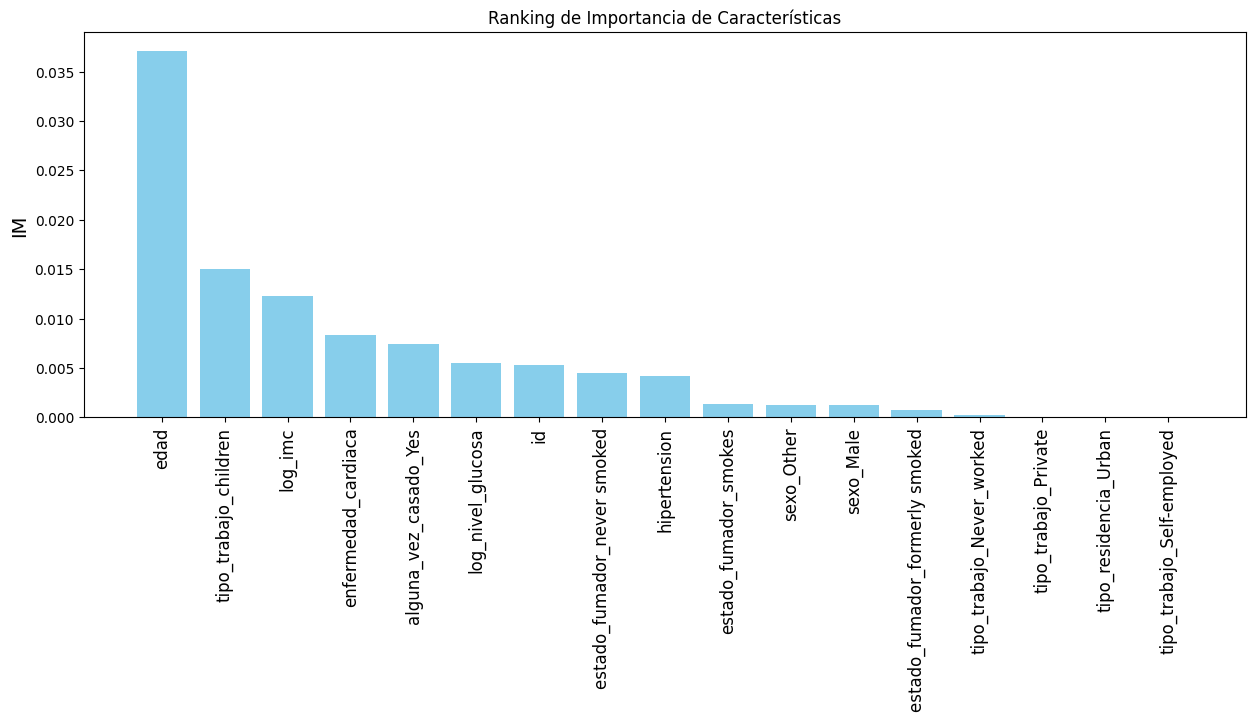

In [ ]:
# Visualizamos el ranking de caracteristicas
plt.figure(figsize=(15, 5))
xs = np.linspace(start=0, stop=len(featureScores)-1, num=len(featureScores))
plt.bar(xs, featureScores['IM'].values, color='skyblue')
plt.xticks(xs, featureScores['Caracteristica'], rotation=90, fontsize=12)
plt.ylabel('IM', fontsize=14)
plt.title('Ranking de Importancia de Características')
plt.show()

Plantear la selección de característica basada en métodos wrapper.

En este caso vamos a utilizar Recursive Feature Elimination (RFE), un método hacia atrás (backward selection), donde se empieza con todas las características y se eliminan aquellas que no contribuyen significativamente al rendimiento del modelo.

Este enfoque es útil cuando se quiere reducir el conjunto de características eliminando las menos relevantes de manera iterativa.

Es efectivo cuando hay muchas variables y queremos simplificar el modelo sin perder precisión.

Se vasa en un modelo predictivo, en este caso vamos a utilizar, Random Forest, para evaluar la importancia de cada variable.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# Separar X (variables predictoras) y y (variable objetivo)
X = df_processed.drop(columns=["accidente_cerebrovascular"])  # Variables predictoras
y = df_processed["accidente_cerebrovascular"]  # Variable objetivo (binaria)

# Dividir datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [ ]:
# Función para probar modelos con diferentes números de características seleccionadas
def get_models():
    models = dict()
    for i in range(2, len(X.T)+1):  # Probamos desde 2 hasta todas las características
        rfe = RFE(estimator=RandomForestClassifier(random_state=44),
                  n_features_to_select=i)
        model = RandomForestClassifier(random_state=44)
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# Obtener los modelos con diferentes selecciones de características
models = get_models()

In [ ]:
# Función para evaluar el rendimiento de cada modelo
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)  # Calculamos accuracy en el conjunto de prueba
    return score

# Evaluar cada modelo y almacenar resultados
results, names = [], []
for name, model in models.items():
    score = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append(score)
    names.append(name)

    print(f'> N_características {name} --> Accuracy: {score:.3f}')

> N_características 2 --> Accuracy: 0.954
> N_características 3 --> Accuracy: 0.957
> N_características 4 --> Accuracy: 0.954
> N_características 5 --> Accuracy: 0.954
> N_características 6 --> Accuracy: 0.956
> N_características 7 --> Accuracy: 0.957
> N_características 8 --> Accuracy: 0.956
> N_características 9 --> Accuracy: 0.956
> N_características 10 --> Accuracy: 0.956
> N_características 11 --> Accuracy: 0.956
> N_características 12 --> Accuracy: 0.956
> N_características 13 --> Accuracy: 0.957
> N_características 14 --> Accuracy: 0.958
> N_características 15 --> Accuracy: 0.958
> N_características 16 --> Accuracy: 0.957
> N_características 17 --> Accuracy: 0.957


En la evaluación del modelo, podemos apreciar como en cada iteración se considera un número de características, siendo las características escogidas en cada iteración la combinación que mejor resultados ofrece. De acuerdo con los resultados, la precisión (accuaracy) se mantiene estable al rededor de 0.954 - 0.958 a partir de 14 carácteristicas. Esto sugiere que incluir más características no aporta una mejora significativa en el rendimiento del modelo, y que un subconjunto de 14 características podría ser suficiente.

Las 14 características utilizadas son:

In [ ]:
# Obtener el modelo RFE correspondiente a 10 características
rfe_model = models['14'].named_steps['s']  # Acceder al selector RFE dentro del pipeline

# Filtrar características seleccionadas
selected_features = X.columns[rfe_model.support_]

# Mostrar características seleccionadas
print(selected_features)

Index(['id', 'edad', 'hipertension', 'enfermedad_cardiaca', 'sexo_Male',
       'alguna_vez_casado_Yes', 'tipo_trabajo_Private',
       'tipo_trabajo_Self-employed', 'tipo_residencia_Urban',
       'estado_fumador_formerly smoked', 'estado_fumador_never smoked',
       'estado_fumador_smokes', 'log_nivel_glucosa', 'log_imc'],
      dtype='object')


Los métodos de selección de características aplicados en este análisis ofrecen las siguientes perspectivas sobre la importancia de las variables predictoras para la tarea de clasificación del riesgo de accidente cerebrovascular:

**Resultados del método de filtro (Mutual Information):**

El análisis de Mutual Information (IM) reveló un ranking de importancia de las características basado en la información mutua que comparten con la variable objetivo. Las características que mostraron una mayor IM fueron:

- edad

- log_imc

- alguna_vez_casado_Yes

- tipo_trabajo_children

- enfermedad_cardiaca

- log_nivel_glucosa

- hipertension

Este método, al evaluar la relación individual de cada característica con la variable objetivo sin considerar el modelo, sugiere que la edad, el índice de masa corporal transformado, el estado civil (haber estado casado alguna vez) y el tipo de trabajo (niños) son las características con mayor dependencia estadística con la probabilidad de sufrir un accidente cerebrovascular.

Resultados del método wrapper (Recursive Feature Elimination con Random Forest):

El método wrapper RFE, utilizando un modelo de Random Forest para evaluar la importancia de los subconjuntos de características a través de la eliminación recursiva, indicó que un rendimiento óptimo (medido por la precisión) se alcanza con un subconjunto de 14 características:

- id

- edad

- hipertension

- enfermedad_cardiaca

- sexo_Male

- alguna_vez_casado_Yes

- tipo_trabajo_Private

- tipo_trabajo_Self-employed

- tipo_residencia_Urban

- estado_fumador_formerly smoked

- estado_fumador_never smoked

- estado_fumador_smokes

- log_nivel_glucosa

- log_imc

Este método, al considerar la interacción de las características con un modelo predictivo específico, prioriza un conjunto de variables que, en combinación, maximizan el rendimiento del Random Forest.

**Propuesta de exclusión de características:**

Por los resultados de ambos métodos, se podría considerar la exclusión de aquellas características que aparecen con una baja importancia en el ranking de Mutual Information y no fueron seleccionadas por el método RFE.

Observando el gráfico de Mutual Information, características como 'sexo_Other', 'estado_fumador_formerly smoked', 'tipo_trabajo_Self-employed' y 'tipo_residencia_Urban' se encuentran hacia el final del ranking, sugiriendo una menor dependencia individual con la variable objetivo.

Sin embargo, es importante notar que el método RFE sí incluyó algunas de estas variables ('tipo_trabajo_Self-employed', 'tipo_residencia_Urban', 'estado_fumador_formerly smoked') en su conjunto óptimo de 14 características. Esto indica que, aunque su relación individual con la variable objetivo pueda ser débil, podrían aportar información valiosa en combinación con otras características para el modelo Random Forest.

Criterio para la exclusión:

Basándonos en esta exploración inicial, no se propondría la exclusión de características en este momento.

Aunque algunas características tienen una baja puntuación de información mutua, su inclusión en el conjunto seleccionado por RFE sugiere que el modelo Random Forest las encuentra útiles para la predicción. Se podría considerar la exclusión de las características con la puntuación de información mutua más baja y que no fueron seleccionadas por RFE, pero esto debería hacerse con cautela y evaluando el impacto en el rendimiento del modelo mediante validación cruzada.

Por ejemplo, 'sexo_Other' tiene una puntuación de IM muy baja y no fue seleccionada por RFE. Dada la baja frecuencia de esta categoría en los datos, podría ser un candidato para la exclusión, aunque su impacto en el modelo general podría ser mínimo.

En resumen, se recomienda ser conservador con la exclusión de características en esta etapa y basar las decisiones finales en la evaluación del rendimiento del modelo con diferentes subconjuntos de características como la validación cruzada.

### 6. Reducción dimensionalidad

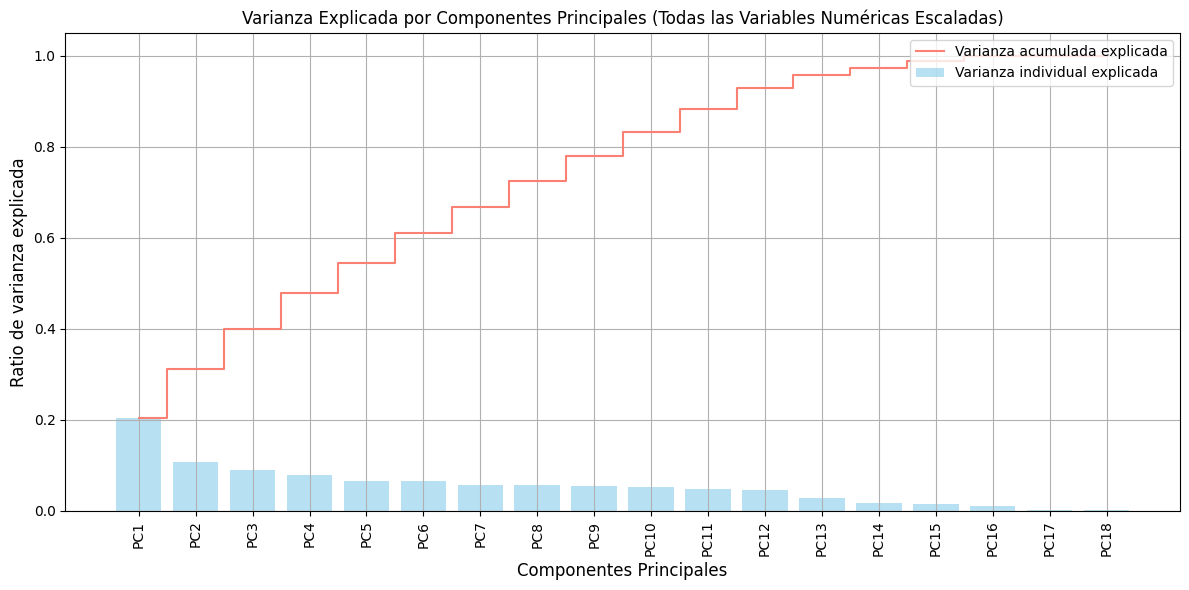

Varianza explicada por cada componente (todas las variables): [0.20287569 0.10775896 0.08912597 0.079165   0.06597368 0.06535524
 0.05746267 0.05673502 0.05532394 0.05290964 0.04897625 0.0467975
 0.02871314 0.01655701 0.01454097 0.00978429 0.00108695 0.00085807]
Varianza acumulada explicada (todas las variables): [0.20287569 0.31063466 0.39976063 0.47892563 0.54489931 0.61025455
 0.66771721 0.72445223 0.77977617 0.83268581 0.88166206 0.92845956
 0.9571727  0.97372971 0.98827068 0.99805498 0.99914193 1.        ]

Primeras filas del DataFrame con los componentes principales (todas las variables):
   accidente_cerebrovascular     id  principal_component_1  \
0                          1   9046               3.510699   
1                          1  51676               1.712468   
2                          1  31112               2.115148   
3                          1  60182               1.857717   
4                          1   1665               1.949580   

   principal_component_2 

In [ ]:
# Aplicamos PCA

# Inicializamos PCA con el número de componentes igual al número de variables escaladas
pca_all = PCA(n_components=df_scaled_all.shape[1])

# Ajustamos PCA a los datos escalados y transformamos los datos
x_componentes_all = pca_all.fit_transform(df_scaled_all)

# Varianza explicada por cada componente
var_exp_all = pca_all.explained_variance_ratio_
cum_var_exp_all = np.cumsum(var_exp_all)

# Representar la varianza y la varianza acumulada
plt.figure(figsize=(12, 6))
plt.bar(range(len(var_exp_all)), var_exp_all, alpha=0.6, align='center', label='Varianza individual explicada', color='skyblue')
plt.step(range(len(cum_var_exp_all)), cum_var_exp_all, where='mid', label='Varianza acumulada explicada', color='salmon')
plt.xticks(ticks=range(len(cum_var_exp_all)), labels=[f'PC{i+1}' for i in range(len(cum_var_exp_all))], rotation=90)
plt.ylabel('Ratio de varianza explicada', fontsize=12)
plt.xlabel('Componentes Principales', fontsize=12)
plt.title('Varianza Explicada por Componentes Principales (Todas las Variables Numéricas Escaladas)')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimimos la varianza explicada y acumulada
print("Varianza explicada por cada componente (todas las variables):", var_exp_all)
print("Varianza acumulada explicada (todas las variables):", cum_var_exp_all)

# Creamos un DataFrame con los componentes principales
pca_df_all = pd.DataFrame(data=x_componentes_all, columns=[f'principal_component_{i+1}' for i in range(x_componentes_all.shape[1])])

# Concatenamos con la variable objetivo y 'id' si los excluimos
df_pca_processed_all = pd.concat([df_processed[['accidente_cerebrovascular', 'id']].reset_index(drop=True), pca_df_all], axis=1)

print("\nPrimeras filas del DataFrame con los componentes principales (todas las variables):")
print(df_pca_processed_all.head())

**Técnica utilizada:**

La técnica de reducción de dimensionalidad utilizada es Análisis de Componentes Principales (PCA).

Después de aplicar PCA al conjunto de datos numérico escalado, el número de componentes principales obtenidos es igual al número de variables numéricas originales (18 en este caso, como se observa en el eje x de la gráfica de varianza explicada). Sin embargo, el objetivo de la reducción de dimensionalidad es seleccionar un número menor de componentes que aún capturen una proporción significativa de la varianza total de los datos.

**Para determinar el número adecuado de componentes** a conservar, se analiza la gráfica de la varianza explicada acumulada. Esta gráfica muestra el porcentaje de la varianza total que se explica al incluir un número creciente de componentes principales.

Observando la gráfica, se puede apreciar que:

- El primer componente principal (PC1) explica aproximadamente el 20% de la varianza.

- Los dos primeros componentes principales (PC1 y PC2) explican alrededor del 30% de la varianza acumulada.

- Los seis primeros componentes principales explican aproximadamente el 60% de la varianza acumulada.

Para retener una proporción sustancial de la varianza, por ejemplo, alrededor del 80%, se necesitarían aproximadamente 10 componentes principales.
Para explicar más del 95% de la varianza, se requerirían aproximadamente 14 componentes principales.

La **decisión sobre el número de componentes** a conservar depende del equilibrio que se quiera lograr entre la reducción de la dimensionalidad y la retención de la información. Un criterio común es elegir el número de componentes que explican un cierto porcentaje de la varianza (por ejemplo, 80% o 90%), o buscar el 'codo' en la gráfica de la varianza acumulada, donde la adición de más componentes aporta una ganancia marginal en la varianza explicada.

En este caso, se podría considerar retener 10 componentes principales, ya que explican una parte considerable de la varianza (80%) y logran una reducción significativa de las 18 dimensiones originales.


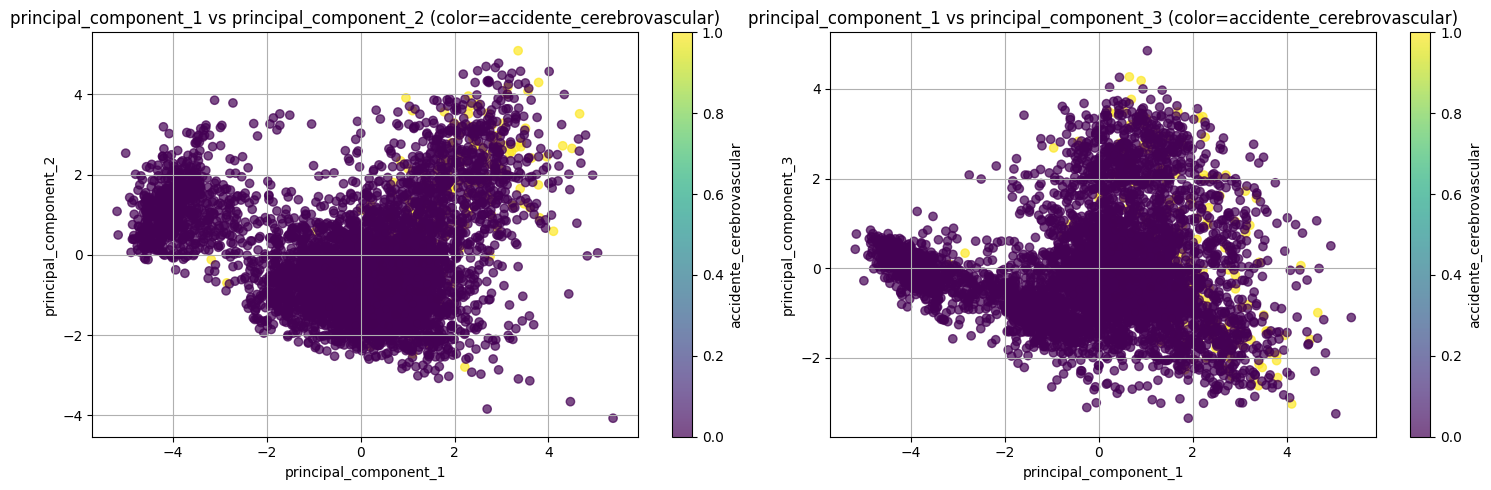

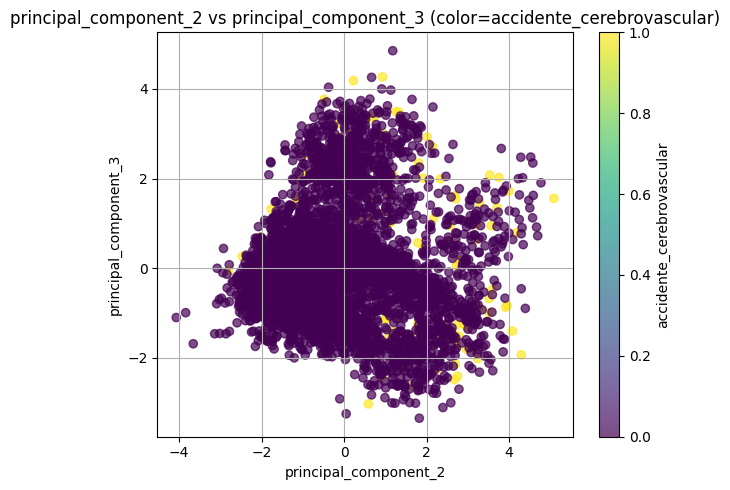

In [ ]:
#6.4.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# graficamos los pares de los 3 primeros componentes principales
if 'principal_component_1' in df_pca_processed_all.columns and \
   'principal_component_2' in df_pca_processed_all.columns and \
   'principal_component_3' in df_pca_processed_all.columns and \
   'accidente_cerebrovascular' in df_pca_processed_all.columns:

    target_variable = 'accidente_cerebrovascular'
    component_1 = 'principal_component_1'
    component_2 = 'principal_component_2'
    component_3 = 'principal_component_3'

    plt.figure(figsize=(15, 5))

    # Componente 1 vs Componente 2
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(df_pca_processed_all[component_1], df_pca_processed_all[component_2],
                        c=df_pca_processed_all[target_variable], cmap='viridis', alpha=0.7)
    plt.xlabel(component_1)
    plt.ylabel(component_2)
    plt.title(f'{component_1} vs {component_2} (color={target_variable})')
    plt.colorbar(scatter, label=target_variable)
    plt.grid(True)

    # Componente 1 vs Componente 3
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(df_pca_processed_all[component_1], df_pca_processed_all[component_3],
                        c=df_pca_processed_all[target_variable], cmap='viridis', alpha=0.7)
    plt.xlabel(component_1)
    plt.ylabel(component_3)
    plt.title(f'{component_1} vs {component_3} (color={target_variable})')
    plt.colorbar(scatter, label=target_variable)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Componente 2 vs Componente 3
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(df_pca_processed_all[component_2], df_pca_processed_all[component_3],
                        c=df_pca_processed_all[target_variable], cmap='viridis', alpha=0.7)
    plt.xlabel(component_2)
    plt.ylabel(component_3)
    plt.title(f'{component_2} vs {component_3} (color={target_variable})')
    plt.colorbar(scatter, label=target_variable)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Asegurarse de que las columnas de los componentes principales y la variable objetivo estén en el DataFrame.")

Interpretación de los resultados


Las gráficas de dispersión de los pares de los primeros componentes principales (PC1 vs PC2 y PC1 vs PC3, así como PC2 vs PC3) muestran una superposición significativa de los puntos que representan a las diferentes clases de 'accidente_cerebrovascular'. No se observa una separación lineal clara entre los pacientes que sufrieron un ictus y los que no en el espacio definido por estos componentes, que son las direcciones de mayor varianza en los datos.

Esta falta de separación lineal sugiere que la relación entre las características originales (ahora representadas por los componentes principales) y la variable objetivo ('accidente_cerebrovascular') es compleja y probablemente no lineal en las direcciones de mayor varianza.

Como conclusión, para una tarea de clasificación efectiva, podría ser necesario considerar un mayor número de componentes principales (10 coponentes como hemos sugerido anteriormente) para capturar más información relevante, o emplear modelos de clasificación no lineales que puedan aprender relaciones más complejas entre las características y la variable objetivo. PCA, aunque útil para la reducción de la dimensionalidad, no siempre revela una separación clara de las clases en sus primeros componentes, especialmente en problemas con relaciones complejas.


### 7. Breves conclusiones o comentarios de los resultados obtenidos en este ejercicio

**Conclusiones Generales del Análisis:**

- **Tratamiento de Datos:** Se imputaron valores faltantes (media para numéricas, moda para categóricas) y se trataron outliers en variables continuas mediante desviación estándar.

- **Transformación:** Se codificaron variables categóricas con One-Hot Encoding. Se aplicó transformación logarítmica a 'nivel_promedio_glucosa' e 'indice_masa_corporal' para corregir asimetrías.

- **Selección de Características:**

  - **Filtro (Mutual Information):** Identificó variables como 'edad', 'log_imc' y 'alguna_vez_casado_Yes' como relevantes.

  - **Wrapper (RFE con Random Forest):** Seleccionó 14 variables clave, combinando factores demográficos, médicos y transformados.

  - Hubo diferencias entre ambos enfoques, lo que refuerza el valor de aplicar múltiples métodos.

- **Reducción de Dimensionalidad (PCA):**

  - Aplicado sobre variables numéricas estandarizadas.

  - Se retuvieron 10 componentes principales que explican gran parte de la varianza.

  - Las clases no se separan claramente en los primeros componentes, lo que sugiere relaciones no lineales con la variable objetivo.

**Conclusión Final:**

El análisis preparó adecuadamente los datos para modelado.
La selección de características y PCA aportaron información útil, aunque será necesario evaluar distintos algoritmos para mejorar la capacidad predictiva, especialmente ante la baja separabilidad lineal observada.